# Title Analysis

We will analyze the relationship between the titles and the sales of a product using a NLP model. We will also find the best words to use in the title to increase the sales of a product by finding the words with the heighest correlation with the sales.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Importing the dataset
df = pd.read_csv(r"D:\1-Toys and Games.csv", usecols=['title', 'monthlyUnitsSold'], nrows=10000)
df

,title,monthlyUnitsSold
0,"Animal Adventure | Sqoosh2Poof Giant, Cuddly, ...",124
1,DJI Mini 3 Pro (DJI RC) & Fly More Kit Plus – ...,3046
2,"Classic Handheld Game Console, Wireless Classi...",15983
3,Step2 Rain Showers Splash Pond Water Table | K...,28285
4,Drone with 1080P Dual HD Camera - 2023 Upgradd...,5383
...,...,...
9995,"Dream On Me Coast Rider Umbrella Stroller, Lig...",277
9996,"Dream On Me Coast Rider Umbrella Stroller, Lig...",277
9997,Baby Einstein Star Bright Symphony Plush Music...,2197
9998,"32 Pack Sunglasses Bulk with UV Protection, 16...",1002


In [3]:
# Cleaning the texts
corpus = []

# Removing all the special characters
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['title'][i])

    # Converting all the letters to lowercase
    review = review.lower()

    # Splitting the words
    review = review.split()

    # Removing the stopwords
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]

    # Joining the words
    review = ' '.join(review)
    corpus.append(review)

In [4]:
# Creating the Bag of Words model
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Training with a LinearSVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(max_iter=10000)
linear_svc.fit(X_train, y_train)

LinearSVC(max_iter=10000)

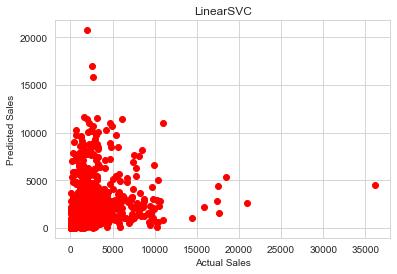

In [10]:
# Visualizing the LinearSVC results (actual vs predicted sales)
y_pred = linear_svc.predict(X_test)
plt.scatter(y_test, y_pred, color='red')
plt.title('LinearSVC')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

Linear SVC seems to be the most accurate model. We will use it to find the best words to use in the title to increase the sales of a product. But first, we must find the optimal hyperparameters.

In [11]:
# Finding the optimal hyperparameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'loss': ['hinge', 'squared_hinge'], 'penalty': ['l1', 'l2']}]
grid_search = GridSearchCV(estimator=linear_svc,
                           param_grid=parameters,
                           scoring='neg_mean_squared_error',
                           cv=10,
                           n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy: ', best_accuracy)
print('Best parameters: ', best_parameters)

C:\Users\shtey\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\shtey\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shtey\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shtey\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, sel

Best accuracy:  -6303502.6535
Best parameters:  {'C': 0.1, 'loss': 'squared_hinge', 'penalty': 'l2'}


In [12]:
# Training with the optimal hyperparameters
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(C=0.1, loss='squared_hinge', penalty='l2', max_iter=10000)
linear_svc.fit(X_train, y_train)

LinearSVC(C=0.1, max_iter=10000)

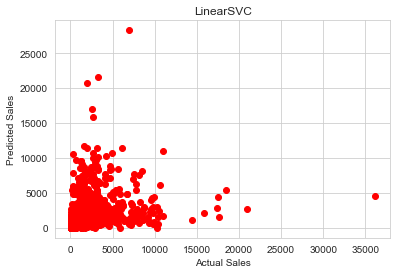

In [13]:
# Visualizing the LinearSVC results (actual vs predicted sales)
y_pred = linear_svc.predict(X_test)
plt.scatter(y_test, y_pred, color='red')
plt.title('LinearSVC')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()